## About this notebook

Boosting methods are applied to the dataset from Kaggle called, "StumbleUpon Evergreen Classification".  See details here:

https://www.kaggle.com/c/stumbleupon

For this analysis, we exclude all rows with any missing observations.  This reduces the sample size by around a half.  For now, we are merely interested in comparing the three boosting methods.

The task is to classify websites as ephemeral or evergreen.

# Train-Test Split

In [3]:
import pandas as pd
import numpy as np

df = pd.read_pickle('train_model')
m = df.shape[0]

In [4]:
features = df.drop(['label'], axis = 1)
label = df.label

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=42)

In [5]:
df.shape

(3566, 23)

In [6]:
df['label'].value_counts()

1    1846
0    1720
Name: label, dtype: int64

In [7]:
X_train.shape

(2389, 22)

# 1. AdaBoost

In [380]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [7]:
ada_clf.fit(X_train, y_train)
train_error = (1 - ada_clf.score(X_train, y_train))
test_error = (1 - ada_clf.score(X_test, y_test))
print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

The training error is: 0.28296
The test     error is: 0.35344


### - Grid Search

In [8]:
from sklearn.model_selection import GridSearchCV

base_estimators = [DecisionTreeClassifier(max_depth=6, min_samples_leaf=1),
                   DecisionTreeClassifier(max_depth=7, min_samples_leaf=1),
                   DecisionTreeClassifier(max_depth=8, min_samples_leaf=1)]
                   
grid_para_ada = [{
    "base_estimator": base_estimators,
    "learning_rate": [0.5, 1.0, 1.5, 2.0],
    "n_estimators": [1500]
}]

ada_clf.set_params(random_state=108)
grid_search_ada = GridSearchCV(ada_clf, grid_para_ada, cv=5, scoring='accuracy', n_jobs=-1)
%time grid_search_ada.fit(X_train, y_train)

CPU times: user 29 s, sys: 152 ms, total: 29.2 s
Wall time: 7min 45s


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=108),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'base_estimator': [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=Fa...andom_state=None, splitter='best')], 'learning_rate': [0.5, 1.0, 1.5, 2.0], 'n_estimators': [1500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [9]:
## best parameters
grid_search_ada.best_params_

{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 'learning_rate': 1.0,
 'n_estimators': 1500}

In [10]:
## best score
grid_search_ada.best_score_

0.6977814985349519

In [11]:
## The overall accuracy on the training set:
grid_search_ada.score(X_train, y_train)

1.0

In [12]:
## The overall accuracy on the test set:
grid_search_ada.score(X_test, y_test)

0.6839422259983008

# 2. Gradient Boosting

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [7]:
gb_clf.fit(X_train, y_train)
train_error = (1 - gb_clf.score(X_train, y_train))
test_error = (1 - gb_clf.score(X_test, y_test))
print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

The training error is: 0.18167
The test     error is: 0.31861


### - Grid Search

In [9]:
from sklearn.model_selection import GridSearchCV
import numpy as np

grid_para_gb = [{
    "max_depth": np.linspace(start=7, stop=9, num=3, dtype=int),
    "learning_rate": [0.05, 0.1, 0.2],
    "n_estimators": [400, 1200],
    "subsample": [0.3, 0.5, 1],
    "max_features": ['auto']        
}]

gb_clf.set_params(random_state=108)
grid_search_gb = GridSearchCV(gb_clf, grid_para_gb, cv=5, scoring='accuracy', n_jobs=-1)
%time grid_search_gb.fit(X_train, y_train)

/Applications/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1093: RuntimeWarning: invalid value encountered in double_scalars
  sample_weight[~sample_mask]))


CPU times: user 5.05 s, sys: 231 ms, total: 5.28 s
Wall time: 7min 49s


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=108,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'max_depth': array([7, 8, 9]), 'learning_rate': [0.05, 0.1, 0.2], 'n_estimators': [400, 1200], 'subsample': [0.3, 0.5, 1], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [10]:
## best parameters
grid_search_gb.best_params_

{'learning_rate': 0.05,
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 400,
 'subsample': 0.5}

In [11]:
## best score
grid_search_gb.best_score_

0.6894097948932608

In [12]:
## The overall accuracy on the training set:
grid_search_gb.score(X_train, y_train)

1.0

In [13]:
## The overall accuracy on the test set:
grid_search_gb.score(X_test, y_test)

0.703483432455395

# 3. XGBoost

In [14]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [15]:
xgb_clf.fit(X_train, y_train)
train_error = (1 - xgb_clf.score(X_train, y_train))
test_error = (1 - xgb_clf.score(X_test, y_test))
print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

The training error is: 0.19548
The test     error is: 0.31266


/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## - Grid Search

In [179]:
from sklearn.model_selection import GridSearchCV

grid_para_xgb = [{
    "max_depth": np.linspace(start=5, stop=7, num=3, dtype=int),
    "learning_rate": [0.01],
    "n_estimators": [400, 600, 800],
    "subsample": [0.3, 0.4, 0.5, 1.0],
    "colsample_bylevel": [1.0], #[0.80],
    "colsample_bytree": [1.0], #[0.5],
    "reg_alpha": [0.05],
    "reg_lambda": [0.05]      
}]

xgb_clf.set_params(random_state=108)
grid_search_xgb = GridSearchCV(xgb_clf, grid_para_xgb, cv=5, scoring='accuracy', n_jobs=-1)
%time grid_search_xgb.fit(X_train, y_train)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is a

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is a

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is a

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is a

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is a

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is a

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is a

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is a

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is a

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is a

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is a

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is a

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is a

CPU times: user 2.55 s, sys: 259 ms, total: 2.81 s
Wall time: 2min 45s


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=108, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'max_depth': array([5, 6, 7]), 'learning_rate': [0.01], 'n_estimators': [400, 600, 800], 'subsample': [0.3, 0.4, 0.5, 1.0], 'colsample_bylevel': [1.0], 'colsample_bytree': [1.0], 'reg_alpha': [0.05], 'reg_lambda': [0.05]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [174]:
## best parameters
grid_search_xgb.best_params_

{'colsample_bylevel': 1.0,
 'colsample_bytree': 1.0,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 600,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.4}

In [175]:
## best score
grid_search_xgb.best_score_

0.7044788614483047

In [176]:
## The overall accuracy on the training set:
grid_search_xgb.score(X_train, y_train)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9321892005023023

In [177]:
## The overall accuracy on the test set:
grid_search_xgb.score(X_test, y_test)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.703483432455395

## 4. Learning Curves

CPU times: user 14.1 s, sys: 16.9 ms, total: 14.1 s
Wall time: 14.1 s


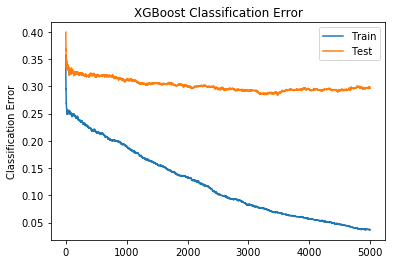

In [342]:
# plot learning curve
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

model = XGBClassifier(
    max_depth = 5,
    learning_rate = 0.003,
    n_estimators = 5000,
    subsample = 0.3,
    colsample_bylevel = 1,
    colsample_bytree = 1,
    reg_alpha = .25,
    reg_lambda = .25)

# fit model no training data
eval_set = [(X_train, y_train), (X_test, y_test)]
%time model.fit(X_train, y_train, eval_metric=["error"], eval_set=eval_set, verbose=False)

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [343]:
1-min(results['validation_1']['error'])

0.716228